### Finding Best Score of Cluster to work with.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

df = sns.load_dataset('iris')

#Scale
scale = StandardScaler()
scaled_df = scale.fit_transform(df.drop('species', axis=1))

for k in range(2, 6):
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(scaled_df)
    labels = gmm.predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"{k} clusters → Silhouette: {score:.2f}, AIC: {gmm.aic(scaled_df):.2f}, BIC: {gmm.bic(scaled_df):.2f}")

'''
Higher silhouette score = better clustering
Range: -1 → 1
> 0.5 → good clusters
≈ 0 → overlapping clusters
< 0 → wrong clustering
'''

2 clusters → Silhouette: 0.58, AIC: 707.40, BIC: 794.71
3 clusters → Silhouette: 0.37, AIC: 669.08, BIC: 801.55
4 clusters → Silhouette: 0.25, AIC: 669.03, BIC: 846.65
5 clusters → Silhouette: 0.29, AIC: 676.32, BIC: 899.11


'\nHigher silhouette score = better clustering\nRange: -1 → 1\n> 0.5 → good clusters\n≈ 0 → overlapping clusters\n< 0 → wrong clustering\n'

###### These CLusters showed that 2 clusters have best Silhouette score of `0.58` so let's practice using `n-components = 2`

### Import libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


### Load the dataset

In [22]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scale the data

In [23]:
#Call StandardScalar
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df.drop('species', axis=1))

### GMM (with 2 components as we found it )

In [ ]:
gmm = GaussianMixture(n_components=2 , covariance_type='full')
gmm.fit(scaled_data)


,n_components,2
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


### Predict

In [25]:
labels = gmm.predict(scaled_data)
df['Cluster'] = labels

In [27]:
score = silhouette_score(scaled_data, labels)
print(f"silhouette_score : {score:.2f}")
#AIE/BIE 
print(f'AIE : {gmm.aic(scaled_data)}')
print(f'BIE : {gmm.bic(scaled_data)}')

silhouette_score : 0.58
AIE : 707.4005788301527
BIE : 794.7090023589441


### Scatter plot 

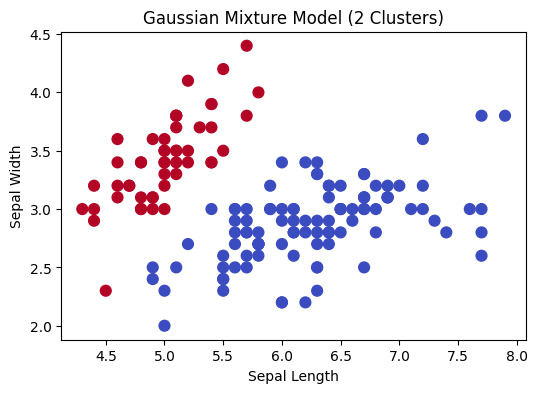

In [30]:
plt.figure(figsize=(6,4))
plt.scatter(x=df['sepal_length'], y=df['sepal_width'], c=labels, cmap='coolwarm', s=60)
plt.title("Gaussian Mixture Model (2 Clusters)")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### Lets do a comparison b/w GMM and K-means

K-Means Silhouette Score: 0.582
GMM Silhouette Score: 0.582


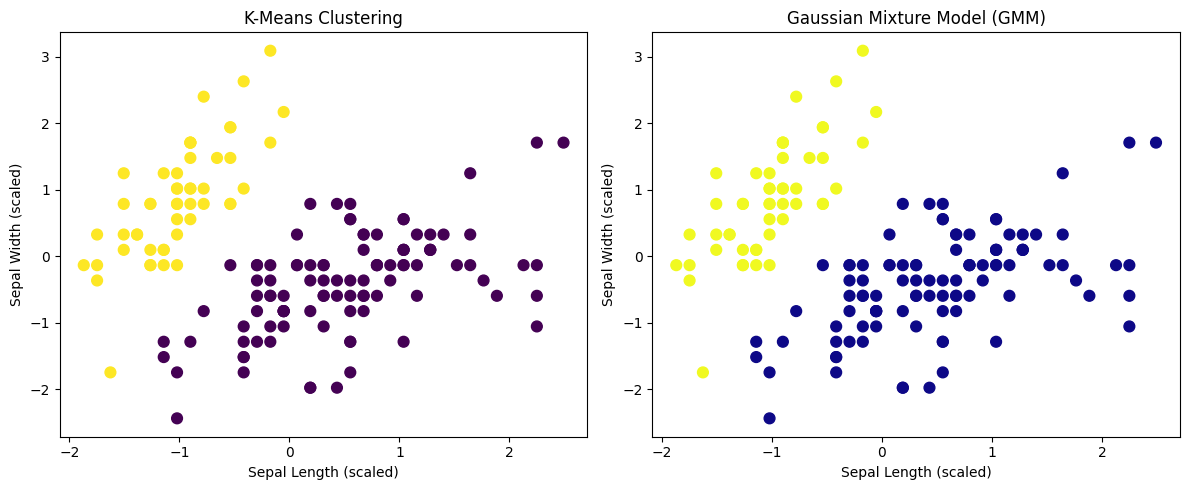

In [31]:
# ==========================================
# Comparison: GMM vs K-Means (Iris Dataset)
# ==========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = sns.load_dataset('iris')

# Scale features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('species', axis=1))

# ----- KMeans -----
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
kmeans_score = silhouette_score(scaled_df, kmeans_labels)

# ----- GMM -----
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)
gmm_score = silhouette_score(scaled_df, gmm_labels)

# ----- Compare Scores -----
print(f"K-Means Silhouette Score: {kmeans_score:.3f}")
print(f"GMM Silhouette Score: {gmm_score:.3f}")

# ----- Plot Comparison -----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(scaled_df[:, 0], scaled_df[:, 1], c=kmeans_labels, cmap='viridis', s=60)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Sepal Length (scaled)')
axes[0].set_ylabel('Sepal Width (scaled)')

axes[1].scatter(scaled_df[:, 0], scaled_df[:, 1], c=gmm_labels, cmap='plasma', s=60)
axes[1].set_title('Gaussian Mixture Model (GMM)')
axes[1].set_xlabel('Sepal Length (scaled)')
axes[1].set_ylabel('Sepal Width (scaled)')

plt.tight_layout()
plt.show()


### Conclusion
* Both are performing equally well on this Iris dataset (since it’s clean and symmetric).
* But if the dataset had overlapping or elliptical clusters, GMM would likely outperform K-Means.